### Cubic Splines
A spline is a piecewise-defined polynomial function. In cubic spline interpolation, the function is defined by piecewise cubic polynomials.<br>
 These polynomials are defined between each pair of data points and are connected smoothly at the data points.

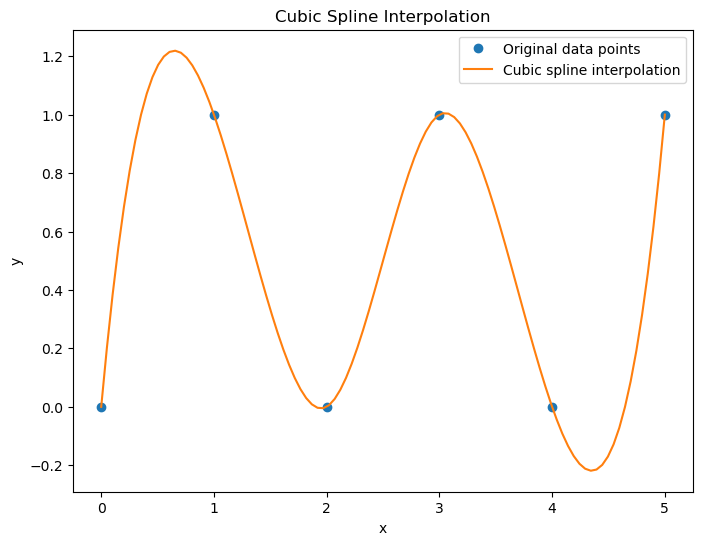

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 2: Define the data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])

# Step 3: Create a CubicSpline object
cs = CubicSpline(x, y)

# Step 4: Use the CubicSpline object to interpolate the data
x_new = np.linspace(0, 5, 100)  # Generate new x values for interpolation
y_new = cs(x_new)  # Interpolated y values

# Plot the original data points and the interpolated curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Original data points')
plt.plot(x_new, y_new, '-', label='Cubic spline interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


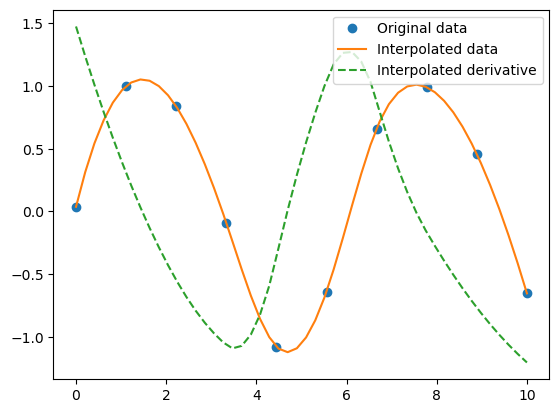

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Example time-series data (with noise)
t = np.linspace(0, 10, 10)
data = np.sin(t) + 0.1 * np.random.randn(10)

# Fit a cubic spline to the data
spline = CubicSpline(t, data)

# Generate collocation points
num_points = 50
collocation_t = np.linspace(t[0], t[-1], num_points)
collocation_data = spline(collocation_t)
collocation_derivative = spline(collocation_t, 1)

# Plot the original data and interpolated data
plt.plot(t, data, 'o', label='Original data')
plt.plot(collocation_t, collocation_data, '-', label='Interpolated data')
plt.plot(collocation_t, collocation_derivative, '--', label='Interpolated derivative')
plt.legend()
plt.show()


## odeint implementation

In [5]:
import jax.numpy as jnp
from jax.experimental.ode import odeint

# Define the system of ODEs
def simple_harmonic_oscillator(y, t, k):
    x, v = y
    dxdt = v
    dvdt = -k * x
    return jnp.array([dxdt, dvdt])


In [6]:
# Initial conditions: initial position and velocity
y0 = jnp.array([1.0, 0.0])  # Initial displacement of 1.0, initial velocity of 0.0

# Time points at which to solve the ODE
t = jnp.linspace(0, 10, 100)

# Spring constant
k = 1.0


In [7]:
# Solve the ODE using odeint
solution = odeint(simple_harmonic_oscillator, y0, t, k)

# The solution is an array where each row is the state [x, v] at a corresponding time point in `t`
x, v = solution.T  # Transpose to get separate arrays for x and v


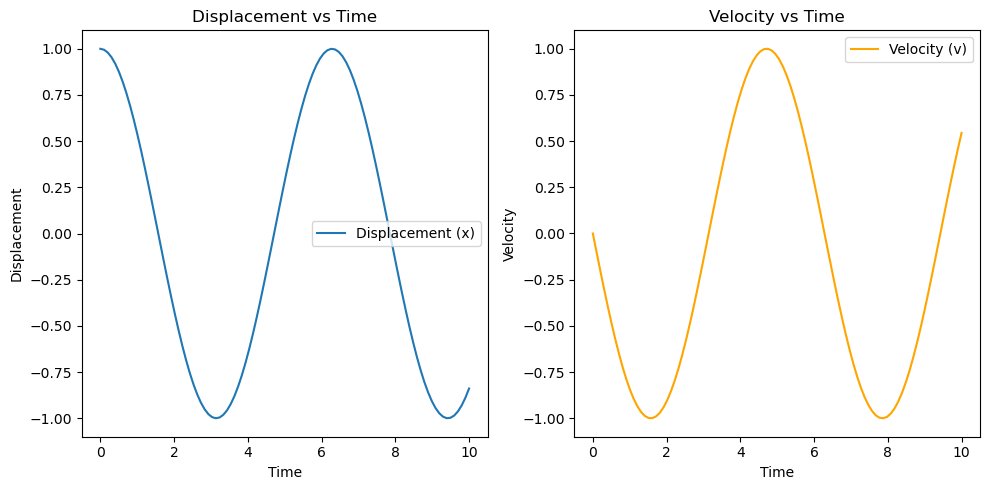

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))

# Plot displacement vs time
plt.subplot(1, 2, 1)
plt.plot(t, x, label='Displacement (x)')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement vs Time')
plt.legend()

# Plot velocity vs time
plt.subplot(1, 2, 2)
plt.plot(t, v, label='Velocity (v)', color='orange')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')
plt.legend()

plt.tight_layout()
plt.show()


### jax.vmap
* vmap (vectorized map) in JAX is used to vectorize a function. It allows you to apply a function over each element of an array (or batch of arrays) in a batched fashion
* automates the process of looping over the elements of an array and applying the function to each element, making it more efficient by leveraging JAX's capabilities

In [1]:
import jax
import jax.numpy as jnp

# Define a simple function
def square(x):
    return x ** 2

# Apply square to each element of an array using vmap
array = jnp.array([1, 2, 3, 4])
vectorized_square = jax.vmap(square)
result = vectorized_square(array)

print(result)  # Output: [1, 4, 9, 16]

[ 1  4  9 16]
